In [1]:
import sys
sys.path.append('/home/dante/Documents/metnum tps again/mn-tp3/tp3/metnum3/lib/python3.8/site-packages')
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
import dataframe_image as dfi
from utils import run_analysis

In [2]:
df = pd.read_csv("../dataset-folder/expectativa_de_vida.csv")
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 183 entries, 0 to 182
Data columns (total 22 columns):
 #   Column                           Non-Null Count  Dtype  
---  ------                           --------------  -----  
 0   Unnamed: 0                       183 non-null    int64  
 1   Country                          183 non-null    object 
 2   Life expectancy                  183 non-null    float64
 3   Adult Mortality                  183 non-null    float64
 4   infant deaths                    183 non-null    float64
 5   Alcohol                          182 non-null    float64
 6   percentage expenditure           183 non-null    float64
 7   Hepatitis B                      174 non-null    float64
 8   Measles                          183 non-null    float64
 9   BMI                              181 non-null    float64
 10  under-five deaths                183 non-null    float64
 11  Polio                            183 non-null    float64
 12  Total expenditure     

In [3]:
df_NaNs = df
df = df.fillna(df.median(numeric_only = True))

In [4]:
df_enfermedades = df[["Hepatitis B", "Polio",
                     "Diphtheria", "HIV/AIDS"]]
df_causantes_pol = df[["Total expenditure", "GDP",
                      "Income composition of resources"]]
df_causantes_per = df[["BMI", "Alcohol"]]


X_enfermedades = df[["Hepatitis B", "Measles", "Polio",
                     "Diphtheria", "HIV/AIDS"]].values
X_causantes_pol = df[["Status", "percentage expenditure",
                      "Total expenditure", "GDP",
                      "Income composition of resources"]].values
X_causantes_per = df[["BMI", "Alcohol"]].values

In [5]:
y = df["Life expectancy"].values.reshape(-1, 1)

plot = sns.boxplot(data = df_enfermedades_red)
plt.ylabel("immunization coverage among 1-year-olds (%)")
fig = plot.get_figure()
fig.savefig("2.png") ## Análisis de enfermedades

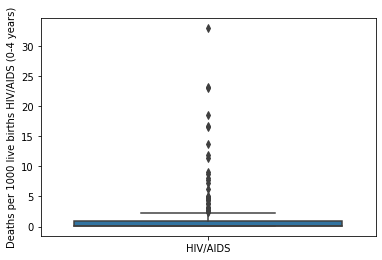

In [6]:
plot = sns.boxplot(data = df_enfermedades[["HIV/AIDS"]])
plt.ylabel("Deaths per 1000 live births HIV/AIDS (0-4 years)")
fig = plot.get_figure()
fig.savefig("images/7.png") 

Life expectancy    1.000000
Hepatitis B        0.424982
Polio              0.679231
Diphtheria         0.672322
HIV/AIDS          -0.587153
Name: Life expectancy, dtype: float64

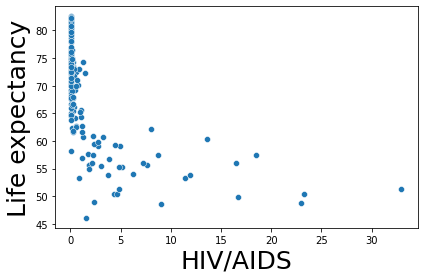

In [23]:
plot = sns.scatterplot(data = df, x = "HIV/AIDS", y = "Life expectancy")
#plt.ylabel("Deaths per 1000 live births HIV/AIDS (0-4 years)")
fig = plot.get_figure()
plt.xlabel("HIV/AIDS", size=25)
plt.ylabel("Life expectancy", size=25)
plt.tight_layout()
fig.savefig("images/8.png") 
df[["Life expectancy", "Hepatitis B", "Polio",
                     "Diphtheria", "HIV/AIDS"]].corr()['Life expectancy']

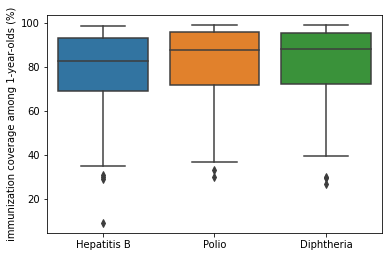

In [34]:
plot = sns.boxplot(data = df_enfermedades[["Hepatitis B", "Polio", "Diphtheria"]])
plt.ylabel("immunization coverage among 1-year-olds (%)")
fig = plot.get_figure()
fig.savefig("images/2.png") 

In [9]:
df_enfermedades.describe()

,Hepatitis B,Polio,Diphtheria,HIV/AIDS
count,183.000000,183.000000,183.000000,183.000000
mean,78.846960,82.393862,82.180816,1.747712
std,17.015672,15.998312,16.520129,4.447630
min,9.000000,29.812500,26.812500,0.100000
25%,68.842424,71.593750,72.375000,0.100000
50%,82.514423,87.812500,88.000000,0.100000
75%,93.366667,95.875000,95.687500,0.996875
max,98.875000,98.937500,99.000000,32.943750


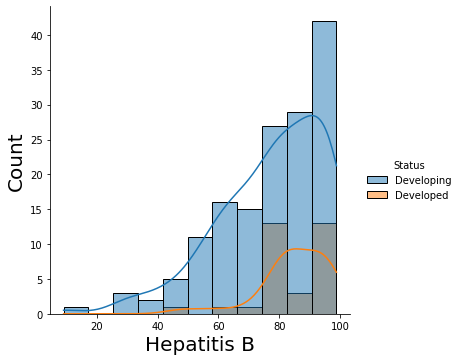

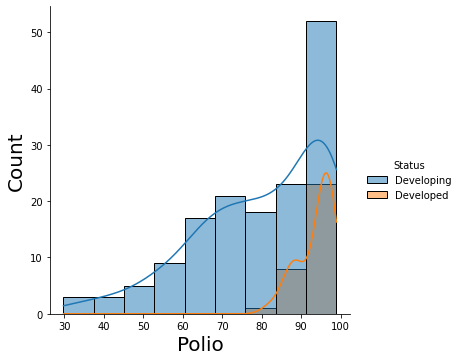

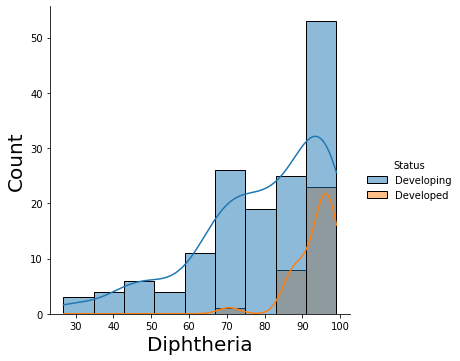

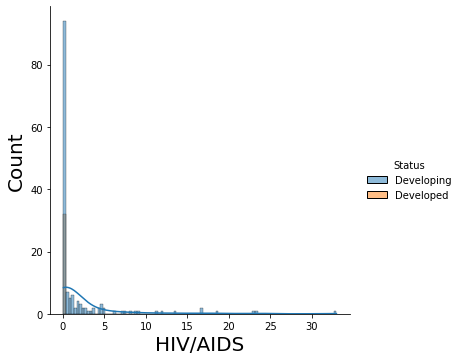

In [33]:
image_save_val=3
for f in ["Hepatitis B", "Polio", "Diphtheria", "HIV/AIDS"]:
    ax =sns.displot(df, x = f, hue = "Status", kde = True)
    #plt.tight_layout()
    #plt.legend(loc='center left')
    plt.xlabel(f, size=20)
    plt.ylabel("Count", size=20)
    if image_save_val<6:
        plt.savefig("images/"+str(image_save_val)+".png")
    image_save_val+=1

Las dividimos según lo que cuantifica cada una

In [36]:
df_enfermedades_red = df_enfermedades[["Hepatitis B", "Polio", "Diphtheria"]]
df_1 = df_enfermedades.corr()
dfi.export(df_1, 'images/1.png')

[1114/192603.348259:WARNING:vaapi_wrapper.cc(586)] VAAPI video acceleration not available for swiftshader
[1114/192603.348395:ERROR:gpu_init.cc(453)] Passthrough is not supported, GL is swiftshader, ANGLE is 
[1114/192603.482311:INFO:headless_shell.cc(653)] Written to file /tmp/tmpph87h5kz/temp.png.


In [ ]:
#df_enfermedades_red['suma_enfermedades'] = df_enfermedades_red[["Polio", "Diphtheria", "Hepatitis B"]].sum(axis=1)

In [37]:
df_enfermedades_red

,Hepatitis B,Polio,Diphtheria
0,64.562500,48.3750,52.3125
1,98.000000,98.1250,98.0625
2,78.000000,91.7500,91.8750
3,70.222222,46.1250,47.6875
4,98.266667,96.9375,98.3125
...,...,...,...
178,66.250000,74.6875,68.5000
179,87.538462,94.9375,91.7500
180,55.687500,67.1250,72.6250
181,69.818182,64.3750,74.2500


In [38]:
df_enfermedades_red.corr()

,Hepatitis B,Polio,Diphtheria
Hepatitis B,1.000000,0.786280,0.788851
Polio,0.786280,1.000000,0.945657
Diphtheria,0.788851,0.945657,1.000000


In [39]:
df_enfermedades_red.describe()

,Hepatitis B,Polio,Diphtheria
count,183.000000,183.000000,183.000000
mean,78.846960,82.393862,82.180816
std,17.015672,15.998312,16.520129
min,9.000000,29.812500,26.812500
25%,68.842424,71.593750,72.375000
50%,82.514423,87.812500,88.000000
75%,93.366667,95.875000,95.687500
max,98.875000,98.937500,99.000000


Se ve que:

- Polio y Diphtheria se relacionan fuertemente.
- Hepatitis B se relaciona con Polio y Diphteria (más con Diphtheria).

### Polio, Diphtheria y Hepatitis B

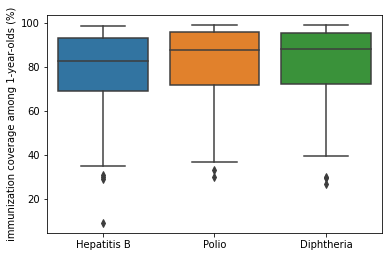

In [41]:
plot = sns.boxplot(data = df_enfermedades_red)
plt.ylabel("immunization coverage among 1-year-olds (%)")
fig = plot.get_figure()
fig.savefig("2.png") 

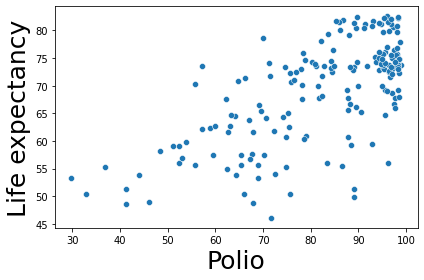

In [40]:
sns.scatterplot(data = df, x = "Polio", y = "Life expectancy")
plt.xlabel("Polio", size=25)
plt.ylabel("Life expectancy", size=25)
plt.tight_layout()
plt.savefig("images/9.png")

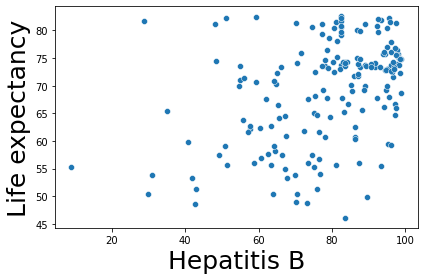

In [21]:
sns.scatterplot(data = df, x = "Hepatitis B", y = "Life expectancy")
plt.xlabel("Hepatitis B", size=25)
plt.ylabel("Life expectancy", size=25)
plt.tight_layout()
plt.savefig("images/10.png") 

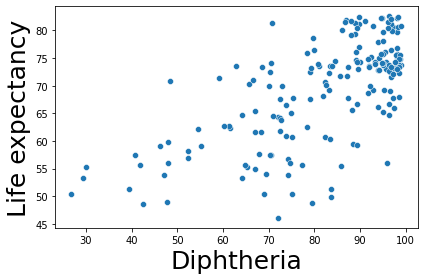

In [22]:
sns.scatterplot(data = df, x = "Diphtheria", y = "Life expectancy")
plt.xlabel("Diphtheria", size=25)
plt.ylabel("Life expectancy", size=25)
plt.tight_layout()
plt.savefig("images/11.png") 

Se ve una distribución casi idéntica para Polio y Diphtheria y una alta correlación. 

Por otro lado Hepatitis B tiene una relación un tanto más dispersa con ambos pero no despreciable.

### Measles y HIV/AIDS

Primero trataremos de convertir una medida de cuantificación a la otra. Investigando, fuentes de la OMS dicen que de los casos registrados de Measles, de un 3% a un 6% mueren.

Convertamos los casos de Measles a muertes por Measles.

In [42]:
df_enfermedades_red2 = df_enfermedades[["HIV/AIDS", "Measles"]]

KeyError: "['Measles'] not in index"

In [43]:
lista = []
for dato in df_enfermedades_red2["Measles"]:    
    lista.append(dato/45)
    
df_enfermedades_red2.insert(2, "Measles deaths", lista, True)    

NameError: name 'df_enfermedades_red2' is not defined

In [ ]:
df_enfermedades_red2

In [ ]:
df_enfermedades_red2.corr()

In [ ]:
sns.boxplot(data = df_enfermedades_red2[["HIV/AIDS", "Measles deaths"]])

In [ ]:
df_enfermedades_red2[["HIV/AIDS", "Measles deaths"]].describe()

In [ ]:
for f in ["HIV/AIDS", "Measles deaths"]:
    sns.displot(df_enfermedades_red2, x = f)

In [ ]:
sns.scatterplot(data = df_enfermedades_red2, x = "HIV/AIDS", y = "Measles deaths")

### NADA DE ESTO FUNCIONA PQ LOS DATOS DE MEASLES ESTÁN MAL

## Analizando los posibles targets de causantes de enfermedades

In [44]:
df_causantes_pol

,Total expenditure,GDP,Income composition of resources
0,8.252500,340.015425,0.415375
1,5.945625,2119.726679,0.709875
2,4.604000,2847.853392,0.694875
3,3.919333,1975.143045,0.458375
4,4.791333,9759.305728,0.488625
...,...,...,...
178,4.998667,2938.078115,0.726812
179,5.977333,2938.078115,0.627063
180,5.005333,2938.078115,0.475500
181,5.824000,811.811841,0.498437


In [46]:
g = df_causantes_pol.corr()
g
dfi.export(g, 'images/12.png')

[1114/192758.311212:WARNING:vaapi_wrapper.cc(586)] VAAPI video acceleration not available for swiftshader
[1114/192758.311371:ERROR:gpu_init.cc(453)] Passthrough is not supported, GL is swiftshader, ANGLE is 
[1114/192758.447716:INFO:headless_shell.cc(653)] Written to file /tmp/tmpsy126pzc/temp.png.


- GDP y percentage expenditure (porcentaje de gasto en salud del GDP) están altamente relacionados. Lógico, cuanto más ingresos, más se invierte en salud.
- Income composition of resources (qué tan productivo son utilizados los recursos) tiene una correlación significante con GDP.

In [47]:
df_causantes_pol.describe()

,Total expenditure,GDP,Income composition of resources
count,183.000000,183.000000,183.000000
mean,5.913770,6781.003752,0.629049
std,1.912335,10155.274116,0.178715
min,1.646667,137.815321,0.131688
25%,4.691333,1063.772982,0.488437
50%,5.945625,2938.078115,0.657250
75%,7.051000,6520.719878,0.754000
max,15.863333,57362.874601,0.931437


<AxesSubplot:>

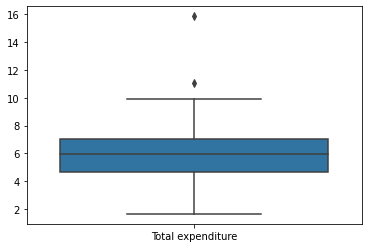

In [48]:
sns.boxplot(data = df_causantes_pol[["Total expenditure"]])

In [49]:
#sns.scatterplot(data = df_causantes_pol, x = "GDP", y = "percentage expenditure")

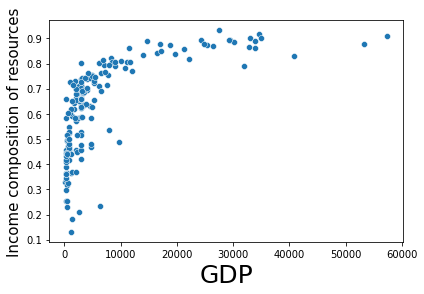

In [64]:
plot = sns.scatterplot(data = df_causantes_pol, x = "GDP", y = "Income composition of resources")
plt.xlabel("GDP", size=25)
plt.ylabel("Income composition of resources", size=15)
plt.tight_layout()
plt.savefig("images/13.png")
#plot.set(xscale="log")

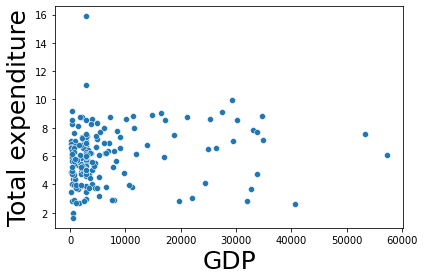

In [61]:
plot = sns.scatterplot(data = df, x = "GDP", y = "Total expenditure")
plt.xlabel("GDP", size=25)
plt.ylabel("Total expenditure", size=25)
plt.tight_layout()
plt.savefig("images/14.png")
#plot.set(xscale="log")

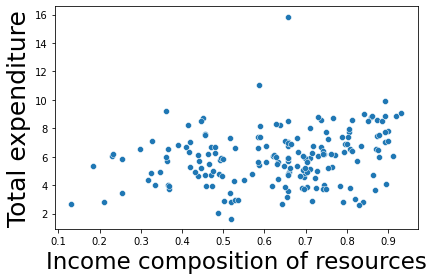

In [65]:
sns.scatterplot(data = df, x = "Income composition of resources", y = "Total expenditure")
plt.xlabel("Income composition of resources", size=23)
plt.ylabel("Total expenditure", size=25)
plt.tight_layout()
plt.savefig("images/15.png")

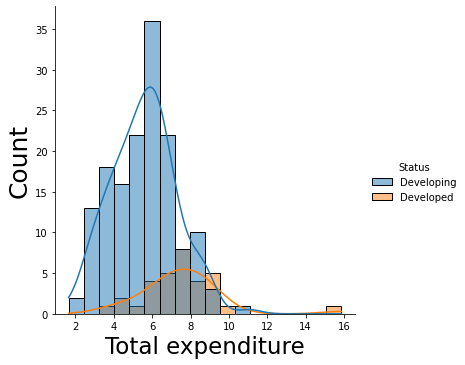

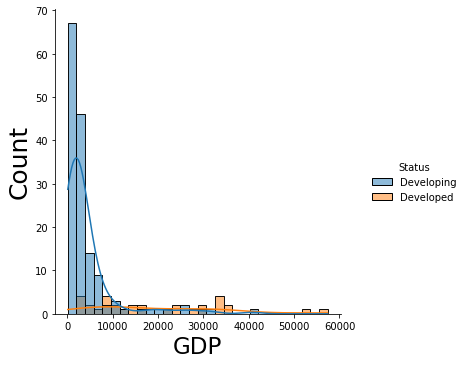

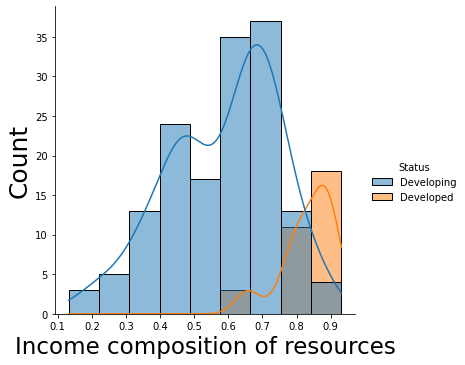

In [69]:
filename_value =16
for f in df_causantes_pol.columns.values:
    sns.displot(df, x = f, hue = "Status", kde = True)
    plt.xlabel(f, size=23)
    plt.ylabel("Count", size=25)
    plt.savefig("images/"+str(filename_value)+".png")
    filename_value+=1
    

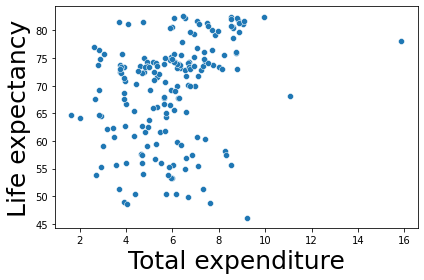

In [66]:
sns.scatterplot(data = df, x = "Total expenditure", y = "Life expectancy")
plt.xlabel("Total expenditure", size=25)
plt.ylabel("Life expectancy", size=25)
plt.tight_layout()
plt.savefig("images/19.png")

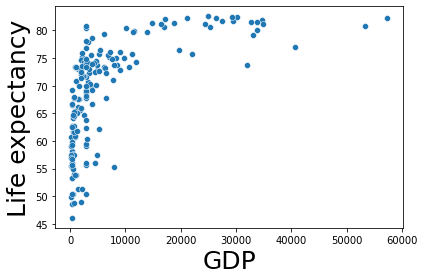

In [67]:
sns.scatterplot(data = df, x = "GDP", y = "Life expectancy")
plt.xlabel("GDP", size=25)
plt.ylabel("Life expectancy", size=25)
plt.tight_layout()
plt.savefig("images/20.png")

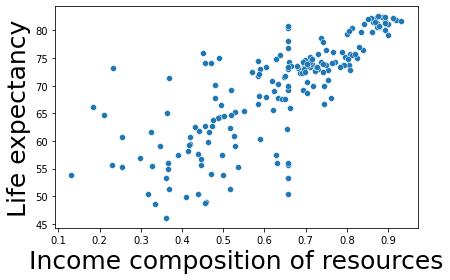

In [68]:
sns.scatterplot(data = df, x = "Income composition of resources", y = "Life expectancy")
plt.xlabel("Income composition of resources", size=25)
plt.ylabel("Life expectancy", size=25)
plt.tight_layout()
plt.savefig("images/21.png")

In [70]:
df[["Life expectancy","Total expenditure", "GDP", "Income composition of resources"]].corr()['Life expectancy']

Life expectancy                    1.000000
Total expenditure                  0.288134
GDP                                0.572807
Income composition of resources    0.777659
Name: Life expectancy, dtype: float64

In [71]:
# df sólo con los países developing
df_developing = df[df["Status"] == "Developing"]

<AxesSubplot:xlabel='Alcohol', ylabel='BMI'>

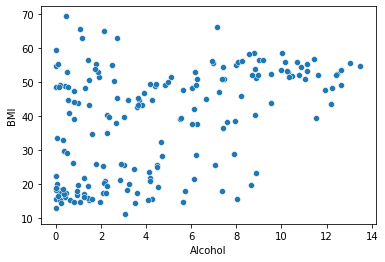

In [72]:
sns.scatterplot(data = df, x = "Alcohol", y = "BMI")

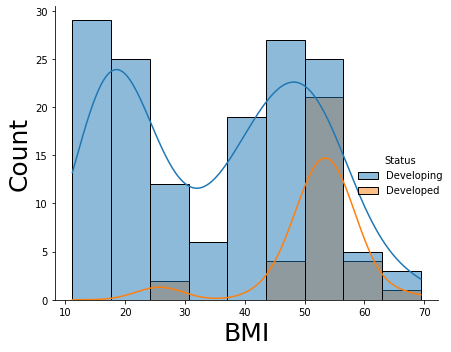

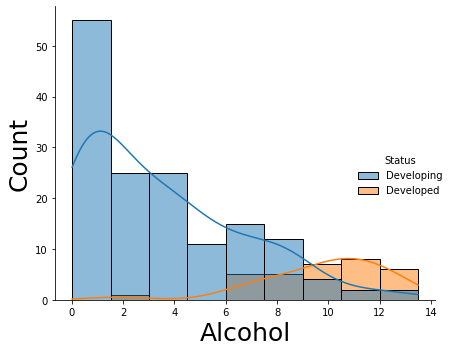

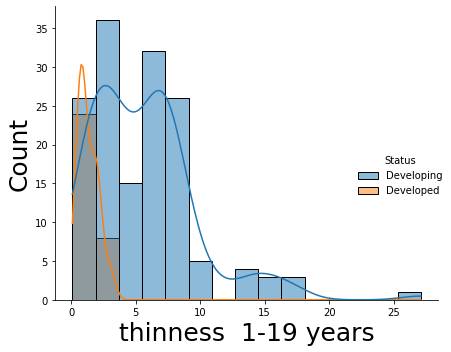

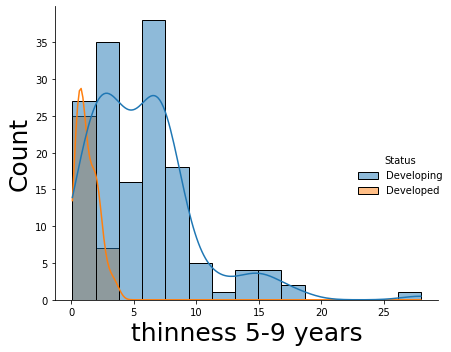

In [80]:
args = ['BMI', 'Alcohol', 'thinness  1-19 years', 'thinness 5-9 years']
df_v2 = df[args]
iterador_savefig=23

for f in df_v2.columns.values:
    sns.displot(df, x = f, hue = "Status", kde = True)
    plt.xlabel(f, size=25)
    plt.ylabel("Count", size=25)
    plt.tight_layout()
    plt.savefig("images/"+str(iterador_savefig)+".png")
    iterador_savefig+=1

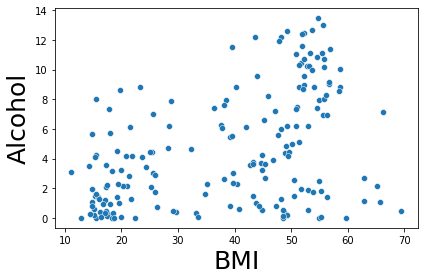

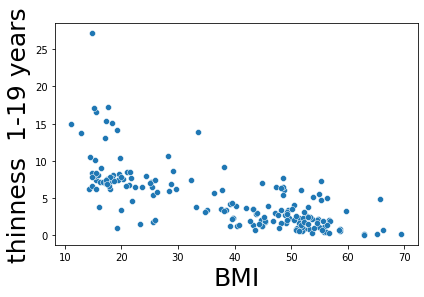

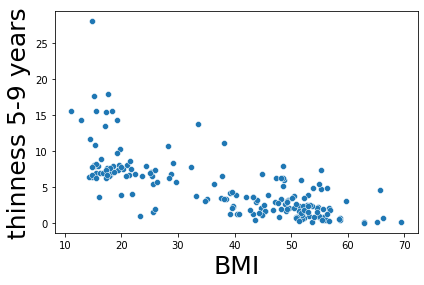

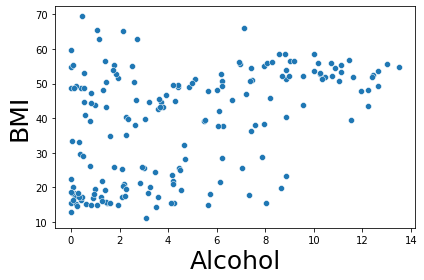

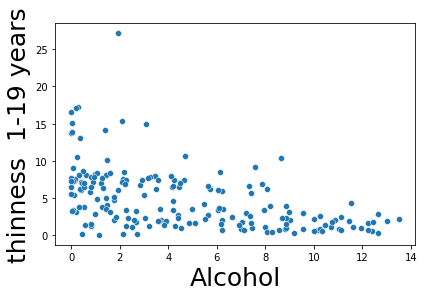

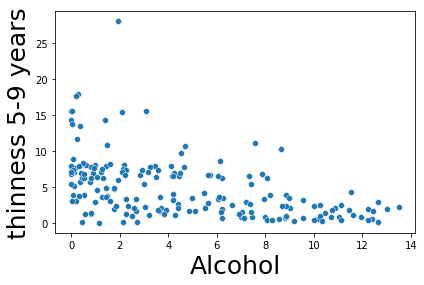

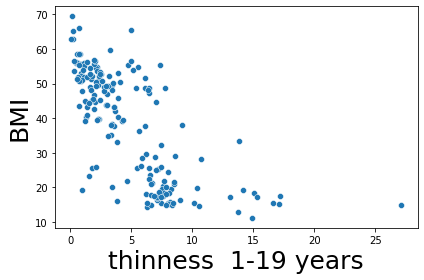

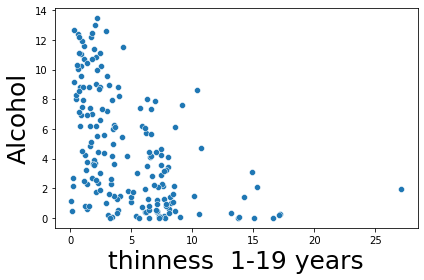

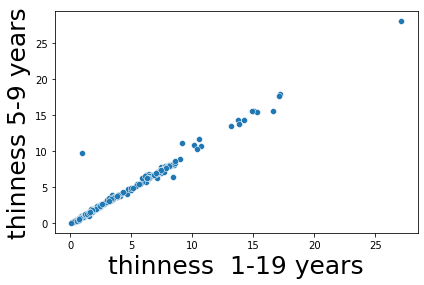

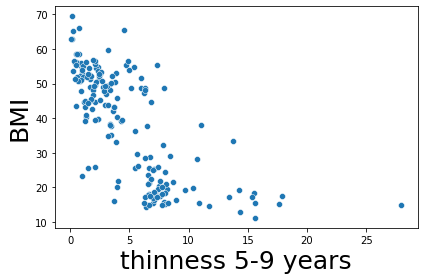

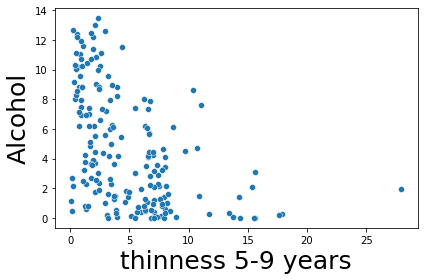

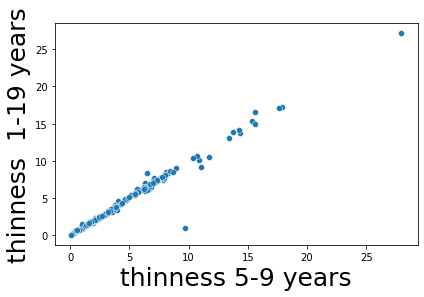

In [79]:
for arg_1 in args:
    for arg_2 in args:
        if arg_1 is not arg_2:
            plot = sns.scatterplot(data = df, x = arg_1, y = arg_2).get_figure()
            plt.xlabel(arg_1, size=25)
            plt.ylabel(arg_2, size=25)
            plt.tight_layout()
            plt.show()

In [82]:
df.sort_values(by="BMI")

,Unnamed: 0,Country,Life expectancy,Adult Mortality,infant deaths,Alcohol,percentage expenditure,Hepatitis B,Measles,BMI,...,Total expenditure,Diphtheria,HIV/AIDS,GDP,Population,thinness 1-19 years,thinness 5-9 years,Income composition of resources,Schooling,Status
179,189,Viet Nam,74.77500,126.5625,29.1875,3.087333,0.000000,87.538462,4232.9375,11.18750,...,5.977333,91.750000,0.14375,2938.078115,3.722046e+06,14.92500,15.62500,0.627063,11.51250,Developing
12,12,Bangladesh,69.30000,141.3750,153.6250,0.010000,32.320972,77.615385,4649.9375,12.87500,...,2.854667,92.750000,0.10000,443.561481,4.298516e+07,13.77500,14.33125,0.517875,8.69375,Developing
89,91,Lao People's Democratic Republic,62.38125,197.1875,10.6250,3.505333,0.000000,60.307692,552.7500,14.36250,...,3.444000,61.500000,0.20000,2938.078115,3.722046e+06,6.27500,6.38125,0.515625,9.23125,Developing
162,171,Timor-Leste,64.75625,170.3750,2.3750,0.235333,21.187523,76.000000,85.0625,14.55000,...,1.646667,64.214286,0.10000,551.710649,4.601956e+05,10.52500,11.69375,0.517625,10.70000,Developing
134,141,Rwanda,59.31250,246.8125,20.7500,5.636000,20.191353,96.000000,505.8750,14.75000,...,6.350667,89.375000,4.42500,300.018017,3.735507e+06,6.63125,6.65625,0.417687,9.28750,Developing
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
164,173,Tonga,72.53125,129.6250,0.0000,1.167333,323.809343,75.500000,0.2500,62.94375,...,5.206000,70.312500,0.10000,1981.555186,2.658981e+04,0.10000,0.10000,0.698813,14.21875,Developing
106,109,Micronesia (Federated States of),68.20000,154.0625,0.0000,2.145333,0.000000,75.437500,8.7500,65.15000,...,11.056000,81.875000,0.10000,2938.078115,3.722046e+06,0.21250,0.20625,0.586812,10.40000,Developing
129,136,Qatar,77.03125,75.3750,0.0000,1.081333,2466.855005,95.062500,96.2500,65.65000,...,2.601333,89.687500,0.10000,40748.444104,3.722046e+06,4.95625,4.58750,0.828375,12.85000,Developing
102,104,Malta,80.36250,60.7500,0.0000,7.130000,1181.431786,80.538462,2.1875,66.18125,...,8.596667,89.312500,0.10000,10114.797943,2.247424e+05,0.75000,0.71250,0.811187,14.30625,Developed


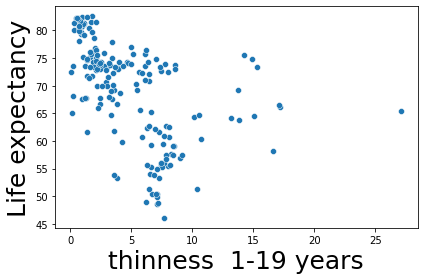

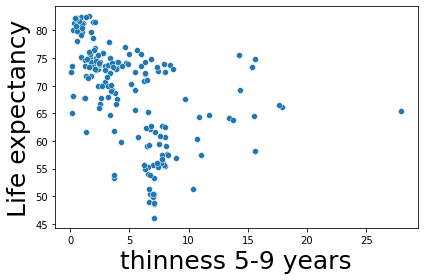

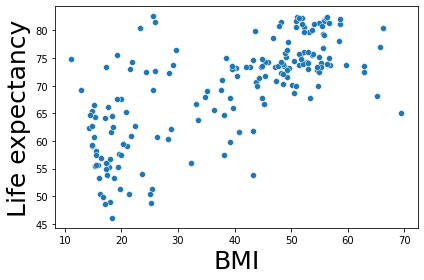

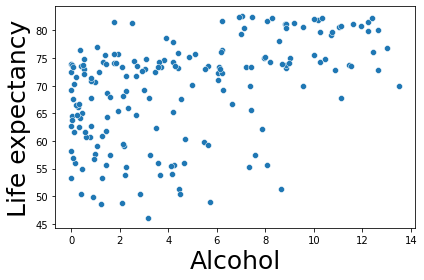

In [84]:
args = ['thinness  1-19 years', 'thinness 5-9 years', 'BMI', 'Alcohol']
for arg_1 in args:
    plot = sns.scatterplot(data = df, x = arg_1, y = 'Life expectancy').get_figure()
    plt.xlabel(arg_1, size=25)
    plt.ylabel('Life expectancy', size=25)
    plt.tight_layout()
    plt.show()

In [85]:
df.corr()[args]

,thinness 1-19 years,thinness 5-9 years,BMI,Alcohol
Unnamed: 0,0.005412,0.021625,0.025486,-0.068426
Life expectancy,-0.514356,-0.507002,0.712117,0.460338
Adult Mortality,0.402323,0.405641,-0.609512,-0.286186
infant deaths,0.511223,0.514146,-0.285870,-0.122681
Alcohol,-0.500129,-0.485756,0.447160,1.000000
percentage expenditure,-0.363125,-0.365292,0.361802,0.465238
Hepatitis B,-0.217887,-0.226417,0.288556,0.158400
Measles,0.315772,0.315019,-0.309800,-0.087982
BMI,-0.714949,-0.717634,1.000000,0.447160
under-five deaths,0.512822,0.514272,-0.299249,-0.119928


In [86]:
consecuencias = ['Schooling', 'Population', 'under-five deaths', 'infant deaths', 'Adult Mortality', 'Life expectancy']
df_cons = df[consecuencias]
df_cons.corr()["Life expectancy"]

Schooling            0.756699
Population          -0.048532
under-five deaths   -0.225785
infant deaths       -0.199914
Adult Mortality     -0.896441
Life expectancy      1.000000
Name: Life expectancy, dtype: float64

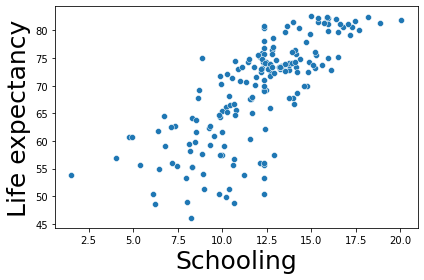

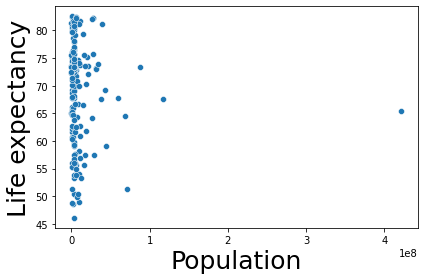

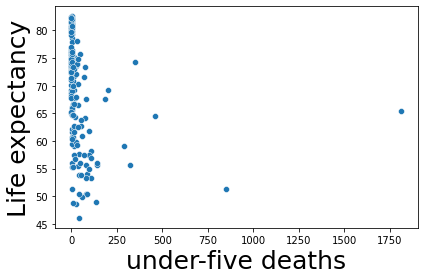

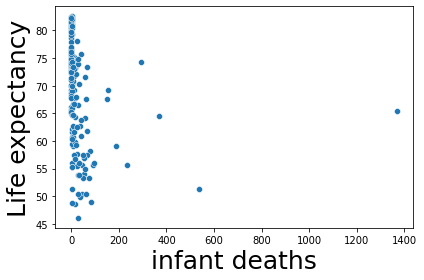

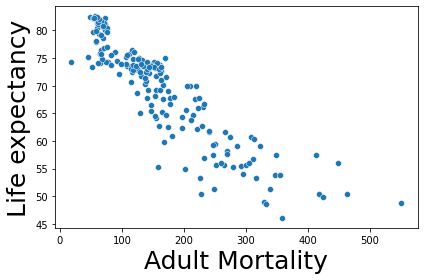

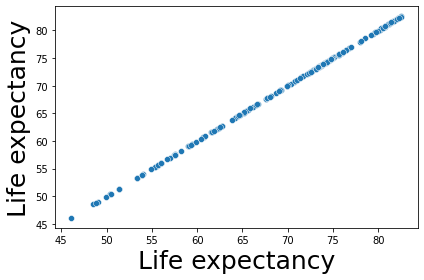

In [88]:
for arg_1 in consecuencias:
    plot = sns.scatterplot(data = df, x = arg_1, y = 'Life expectancy').get_figure()
    plt.xlabel(arg_1, size=25)
    plt.ylabel('Life expectancy', size=25)
    plt.tight_layout()
    plt.show()

In [89]:
df_cons.describe()

,Schooling,Population,under-five deaths,infant deaths,Adult Mortality,Life expectancy
count,183.000000,1.830000e+02,183.000000,183.000000,183.000000,183.000000
mean,12.017760,1.077343e+07,42.179303,30.407445,164.796448,69.224932
std,3.042569,3.412371e+07,157.427874,115.995720,96.185159,9.186432
min,1.531250,3.334250e+03,0.000000,0.000000,18.750000,46.112500
25%,10.156250,1.525259e+06,0.187500,0.000000,80.406250,62.475000
50%,12.331250,3.722046e+06,3.687500,2.937500,146.562500,72.487500
75%,13.971875,6.943706e+06,30.218750,22.125000,219.593750,75.106250
max,20.037500,4.214677e+08,1812.500000,1366.687500,550.062500,82.537500


In [90]:
df_red = df[df["under-five deaths"] < 200]
df.corr()

,Unnamed: 0,Life expectancy,Adult Mortality,infant deaths,Alcohol,percentage expenditure,Hepatitis B,Measles,BMI,under-five deaths,Polio,Total expenditure,Diphtheria,HIV/AIDS,GDP,Population,thinness 1-19 years,thinness 5-9 years,Income composition of resources,Schooling
Unnamed: 0,1.000000,-0.017423,0.051565,-0.030905,-0.068426,-0.044053,-0.009543,-0.034746,0.025486,-0.026858,0.017089,0.059881,-0.016574,0.103958,-0.042027,-0.029696,0.005412,0.021625,-0.024033,-0.023135
Life expectancy,-0.017423,1.000000,-0.896441,-0.199914,0.460338,0.524320,0.424982,-0.201076,0.712117,-0.225785,0.679231,0.288134,0.672322,-0.587153,0.572807,-0.048532,-0.514356,-0.507002,0.777659,0.756699
Adult Mortality,0.051565,-0.896441,1.000000,0.099440,-0.286186,-0.424081,-0.323565,0.098834,-0.609512,0.119620,-0.531039,-0.189767,-0.511538,0.696999,-0.476087,0.003835,0.402323,0.405641,-0.617743,-0.575950
infant deaths,-0.030905,-0.199914,0.099440,1.000000,-0.122681,-0.117735,-0.302109,0.711078,-0.285870,0.996959,-0.241408,-0.166771,-0.240281,0.024589,-0.137075,0.893373,0.511223,0.514146,-0.157516,-0.198099
Alcohol,-0.068426,0.460338,-0.286186,-0.122681,1.000000,0.465238,0.158400,-0.087982,0.447160,-0.119928,0.358592,0.424819,0.342223,-0.087220,0.439916,-0.044345,-0.500129,-0.485756,0.529341,0.584941
percentage expenditure,-0.044053,0.524320,-0.424081,-0.117735,0.465238,1.000000,0.053111,-0.110970,0.361802,-0.120997,0.290563,0.237425,0.273418,-0.147532,0.942968,-0.046727,-0.363125,-0.365292,0.571490,0.550635
Hepatitis B,-0.009543,0.424982,-0.323565,-0.302109,0.158400,0.053111,1.000000,-0.269598,0.288556,-0.316781,0.786280,0.151571,0.788851,-0.187507,0.127550,-0.209721,-0.217887,-0.226417,0.322994,0.374394
Measles,-0.034746,-0.201076,0.098834,0.711078,-0.087982,-0.110970,-0.269598,1.000000,-0.309800,0.719636,-0.239703,-0.169604,-0.258502,0.034536,-0.127112,0.470007,0.315772,0.315019,-0.126524,-0.152123
BMI,0.025486,0.712117,-0.609512,-0.285870,0.447160,0.361802,0.288556,-0.309800,1.000000,-0.299249,0.492030,0.382968,0.480829,-0.339924,0.424606,-0.142126,-0.714949,-0.717634,0.632331,0.655377
under-five deaths,-0.026858,-0.225785,0.119620,0.996959,-0.119928,-0.120997,-0.316781,0.719636,-0.299249,1.000000,-0.267112,-0.168763,-0.267143,0.037544,-0.141815,0.878088,0.512822,0.514272,-0.176865,-0.213797


<AxesSubplot:xlabel='under-five deaths', ylabel='Life expectancy'>

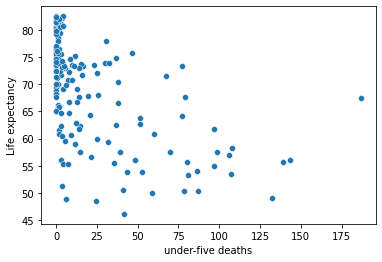

In [91]:
sns.scatterplot(data = df_red, x = "under-five deaths", y = 'Life expectancy')

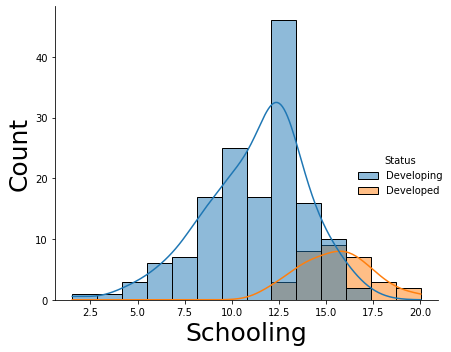

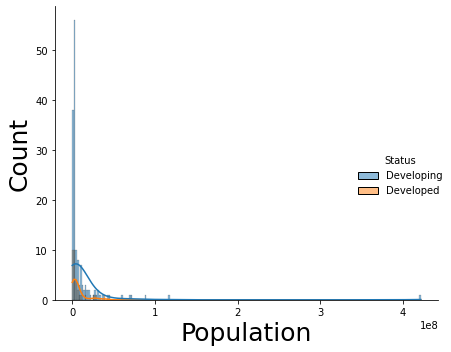

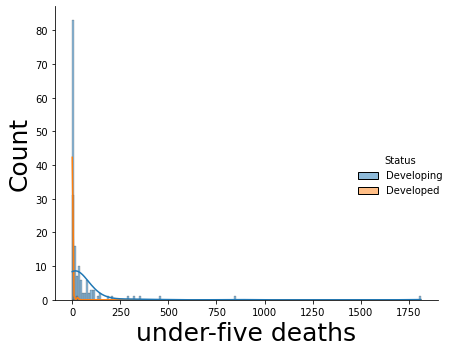

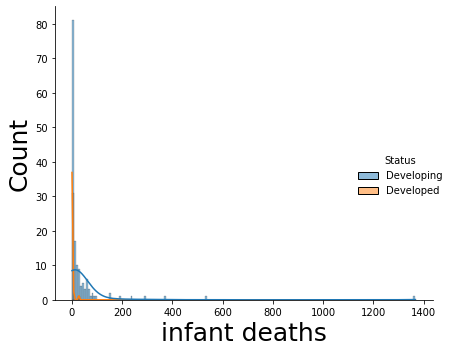

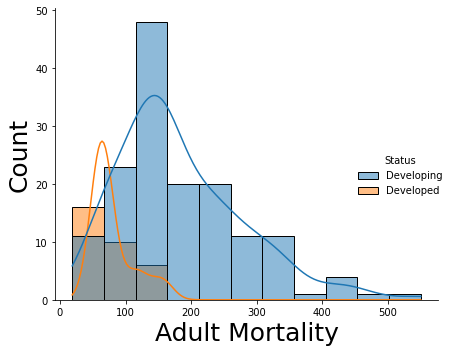

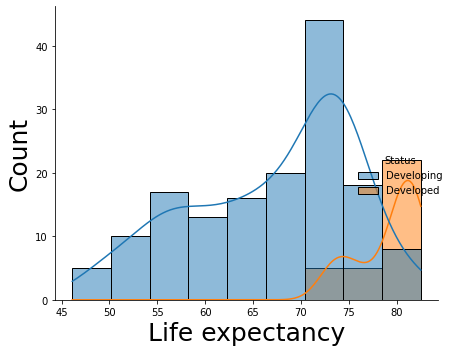

In [93]:

for f in df_cons.columns.values:
    sns.displot(df, x = f, hue = "Status", kde = True)
    plt.xlabel(f, size=25)
    plt.ylabel('Count', size=25)
    plt.tight_layout()